本文主要介绍GeoPandas的基本使用方法，以绘制简单的地图。GeoPandas是一个Python开源项目，旨在提供丰富而简单的地理空间数据处理接口。GeoPandas扩展了Pandas的数据类型，并使用matplotlib进行绘图。GeoPandas官方仓库地址为：[GeoPandas](https://github.com/geopandas/geopandas)。GeoPandas的官方文档地址为：[GeoPandas-doc](https://geopandas.org/en/stable/docs.html)。

GeoPandas推荐使用Python3.7版本及以上，运行环境最好是linux系统。GeoPandas安装命令如下：

> pip install geopandas

如果上述命令安装出问题，则推荐使用conda安装GeoPandas，命令如下：

> conda install geopandas

或：

> conda install --channel conda-forge geopandas

In [1]:
# jupyter notebook环境去除warning
import warnings
warnings.filterwarnings("ignore")

# 查看geopandas版本
import geopandas as gpd

gpd.__version__


'0.10.2'

#  1 基础结构

GeoPandas在Pandas的基础上增加对地理空间数据的支持。其主要结构为GeoSeries和GeoDataFrame。如下图所示，整张图片表示一个GeoDataFrame，行表示地图上的某一区域，列表示该区域的属性数据，其中geometry表示该区域的位置信息。每一个区域的位置形状用一个或多个几何对象表示，几何对象在GeoPandas中以GeoSeries格式数据构成。

![](https://geopandas.org/en/latest/_images/dataframe.svg)

## 1.1 GeoSeries

### 1.1.1 GeoSeries基础元素

在Geogeopandas中，GeoSeries用于构成基础的几何对象。GeoSeries由Python库Shapely实现的几何对象构成，这些几何元素可以是点（集）、线（集）、面（集）：

+ Points / Multi-Points

+ Lines / Multi-Lines

+ Polygons / Multi-Polygons

在jupyter notebook中， 可以直接以svg格式展示GeoSeries中的单个元素，使用如下：

**Points 点**

In [2]:
# Point(x,y)用于创建单个点
from shapely.geometry import Point
p = gpd.GeoSeries([Point(1, 1), Point(2, 2), Point(3, 3)],index=['p1','p2','p3'])
p

p1    POINT (1.00000 1.00000)
p2    POINT (2.00000 2.00000)
p3    POINT (3.00000 3.00000)
dtype: geometry

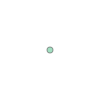

In [3]:
# 展示单个元素
p[0]

**Multi-Points 点集**

In [4]:
# MultiPoint([(x1,y1), ... ,(xn,yn)])用于创建多个点构成的集合
from shapely.geometry import MultiPoint
mp = gpd.GeoSeries([MultiPoint([(0, 1), (1, 0)]),
                    MultiPoint([(0, 0), (1, 1)])],
                    index=['mp1', 'mp2'])
mp

mp1    MULTIPOINT (0.00000 1.00000, 1.00000 0.00000)
mp2    MULTIPOINT (0.00000 0.00000, 1.00000 1.00000)
dtype: geometry

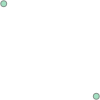

In [5]:
# 展示单个元素
mp[0]

**Lines 线**

In [6]:
# LineString([(x1,y1), ... , (xn,yn)])用于创建单条线段
from shapely.geometry import LineString
l = gpd.GeoSeries([LineString([(0.5, 0), (1, 2), (0, 1)]),
                   LineString([(0, 0), (3.3, 1)])],
                   index=['l1', 'l2'])
l

l1    LINESTRING (0.50000 0.00000, 1.00000 2.00000, ...
l2        LINESTRING (0.00000 0.00000, 3.30000 1.00000)
dtype: geometry

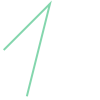

In [7]:
# 展示单个元素
l[0]

**MultiLineString 线集**

In [8]:
# MultiLineString([LineString1,LineString2])用于创建多条线段的集合
from shapely.geometry import MultiLineString
ml = gpd.GeoSeries([MultiLineString([[(1, 0), (2, 1)], [(-1, 0), (0, 5), (1, 0)]]),
               MultiLineString([[(0.5, 0), (1, 2), (0, 1)]])],
               index=['m1','m2'])
ml

m1    MULTILINESTRING ((1.00000 0.00000, 2.00000 1.0...
m2    MULTILINESTRING ((0.50000 0.00000, 1.00000 2.0...
dtype: geometry

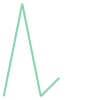

In [9]:
# 展示单个元素
ml[0]

**Polygon 面**

在Polygon元素，其创建函数为：

```
# shell表示单个多边形坐标，hole表示是否在内部创建空洞
Polygon(shell=None, holes=None)
```


In [10]:
# 创建单个多边形
from shapely.geometry import Polygon

pol = gpd.GeoSeries([Polygon([(0, 0), (4, 1), (5, 3), (0, 7)]),
                     Polygon([(0, 0), (1, 1), (1, 2)])],
                    index=['pol1','pol2'])
pol

pol1    POLYGON ((0.00000 0.00000, 4.00000 1.00000, 5....
pol2    POLYGON ((0.00000 0.00000, 1.00000 1.00000, 1....
dtype: geometry

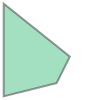

In [11]:
# 展示单个元素
pol[0]

In [12]:
# 创建带空洞的单个多边形
pol = gpd.GeoSeries([Polygon([(0, 0), (4, 1), (5, 3), (0, 7)],
                     [((1, 1),(1,2),(2,2),(2,1)),
                     ((4,2),(4,3),(1,5))])])
pol

0    POLYGON ((0.00000 0.00000, 4.00000 1.00000, 5....
dtype: geometry

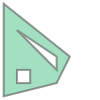

In [13]:
# 展示单个元素
pol[0]

**MultiPolygon 面集**

In [14]:
# MultiPolygon([Polygon,Polygon])用于创建多个多边形的集合
from shapely.geometry import Polygon, MultiPolygon

mpol = gpd.GeoSeries([MultiPolygon([Polygon([(0, 0), (0, 1), (1, 1), (1, 0)]),
                                    Polygon([(2, 3), (3, 2), (3, 3)])])])
mpol

0    MULTIPOLYGON (((0.00000 0.00000, 0.00000 1.000...
dtype: geometry

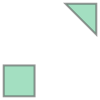

In [15]:
# 展示单个元素
mpol[0]

### 1.1.2 GeoSeries属性与方法

GeoSeries常用属性如下：

+ area: 计算GeoSeries每一个元素的面积，面积单位取决于坐标系
+ bounds: 获得GeoSeries每一个元素的最小外接矩形的左上角坐标和右下角坐标
+ total_bounds：计算整个GeoSeries对象的最小外接矩形的左上角坐标和右下角坐标
+ length：计算GeoSeries每一个元素的周长，周长单位取决于坐标系
+ geom_type: 获得GeoSeries每一个元素的类型
+ is_valid: 判断GeoSeries每一个元素是否构成合理的多边形
+ centroid：获得GeoSeries每一个元素的几何中心

In [16]:
# 创建包含两个多边形的GeoSeries
from shapely.geometry import Polygon

pol = gpd.GeoSeries([Polygon([(0, 0), (4, 1), (5, 3), (0, 7)]),
                    Polygon([(0, 0), (1, 1), (1, 8)])],
                    index=['pol1','pol2'])

In [17]:
# 计算各个元素的面积
pol.area

pol1    21.0
pol2     3.5
dtype: float64

In [18]:
# 计算各元素的最小外接矩形的顶点数据
pol.bounds

,minx,miny,maxx,maxy
pol1,0.0,0.0,5.0,7.0
pol2,0.0,0.0,1.0,8.0


In [19]:
# 计算整个对象的最小外接矩形的顶点数据
pol.total_bounds

array([0., 0., 5., 8.])

In [20]:
# 计算GeoSeries每一个元素的周长
pol.length

pol1    19.762298
pol2    16.476471
dtype: float64

In [21]:
# 获得GeoSeries每一个元素的类型
pol.type

pol1    Polygon
pol2    Polygon
dtype: object

In [22]:
# 判断GeoSeries每一个元素是否构成合理的多边形
pol.is_valid

pol1    True
pol2    True
dtype: bool

In [23]:
# 获得GeoSeries每一个元素的几何中心
pol.centroid

pol1    POINT (1.88889 3.00000)
pol2    POINT (0.66667 3.00000)
dtype: geometry

GeoSeries常用方法如下：

+ distance(): 计算GeoSeries每一个元素到某一几何体的距离，具体使用查看官方文档
+ representative_point()：返回位于GeoSeries每一个元素中的坐标点，该点不会是几何中心。
+ to_crs()：改变GeoSeries的坐标参考系
+ plot()：绘制整个GeoSeries

In [24]:
# 创建包含两个多边形的GeoSeries
from shapely.geometry import Polygon

pol = gpd.GeoSeries([Polygon([(0, 0), (4, 1), (5, 3), (0, 7)]),
                    Polygon([(0, 0), (1, 1), (1, 8)])],
                    index=['pol1','pol2'])

In [25]:
# 计算距离
point = Point(1, 0)
pol.distance(point)

pol1    0.242536
pol2    0.707107
dtype: float64

In [26]:
# 返回位于GeoSeries每一个元素中的坐标点
pol.representative_point()

pol1    POINT (1.25000 5.00000)
pol2    POINT (0.78125 4.50000)
dtype: geometry

In [27]:
# 绘制整个GeoSeries
pol.plot()

## 1.2 GeoDataFrame

GeoDataFrame是包含GeoSeries的表格数据结构，GeoDataFrame最重要的属性是它始终具有一个表示地理状态信息的GeoSeries列，即geometry列。调用GeoDataFrame的方法或属性时，将始终作用于geometry列。

下面用一个世界地图的实例介绍GeoDataFrame常用函数的使用方法，具体函数的接口请查阅官方文档。

**⚠⚠⚠注意该世界地图数据集来自geopandas自带数据集，部分数据数据可能缺失或错误，且数据集仅可用于学习不做其他用途**

In [28]:
import geopandas as gpd
# 加载自带世界地图数据集
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# 查看数据集
# 人口，大洲，国名，国家缩写，ISO国家代码，gdp，地理位置数据
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


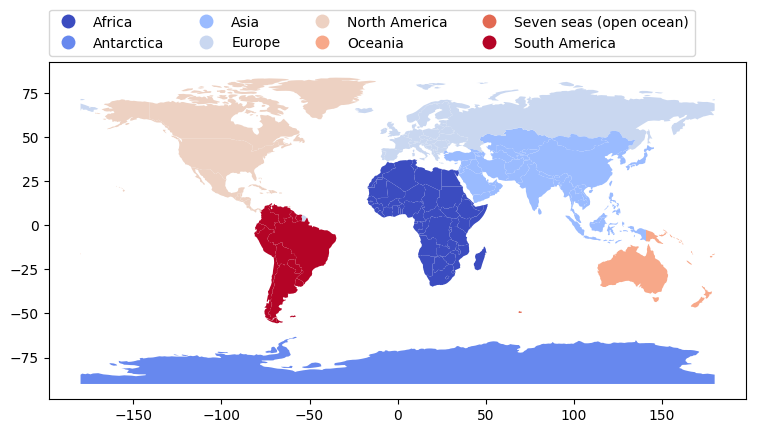

In [29]:
# 绘制GeoDataFrame
# column选择为地图着色的数据列
# kind设置图片类型，某些类型会导致column参数不可用
# cmap设置matplotlib调色板
# legend设置是否显示图例
# figsize设置图片大小
# legend_kwds设置matplotlib的legend参数，该参数需要根据实际图例形式设置
world.plot(column="continent",kind="geo", 
            cmap="coolwarm",legend=True,figsize=(9,6), 
            legend_kwds={'loc': (0,1.02),'ncol':4})

In [30]:
# 获得设置地理位置信息的列名
world.geometry.name
# 修改地理位置信息的列名，一般不要修改
# world = world.rename(columns={'geometry': 'borders'}).set_geometry('borders')
# world.geometry.name

'geometry'

In [31]:
# 计算各个区域的几何中心，并新增列centroid_column
world['centroid_column'] = world.centroid
# 以centroid_column表示地理位置信息
world = world.set_geometry('centroid_column')
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,centroid_column
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",POINT (163.85316 -17.31631)
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",POINT (34.75299 -6.25773)
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",POINT (-12.13783 24.29117)
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",POINT (-98.14238 61.46908)
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",POINT (-112.59944 45.70563)


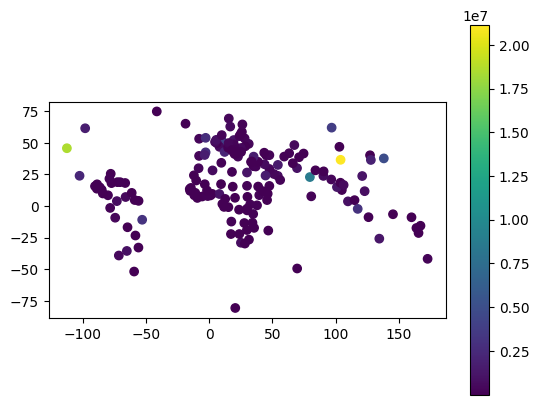

In [32]:
# 根据gdp绘图
world.plot(column="gdp_md_est",legend=True)

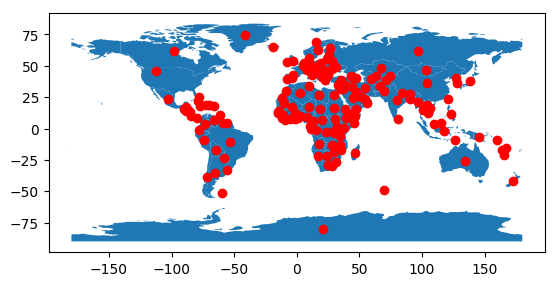

In [33]:
# 叠加几何中心绘图
ax = world["geometry"].plot()
world["centroid_column"].plot(ax=ax, color="red")

In [34]:
# 设置数据小数精度
gpd.options.display_precision = 1
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,centroid_column
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.0 -16.1, 180.0 -16.6, 179....",POINT (163.9 -17.3)
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.9 -1.0, 34.1 -1.1, 37.7 -3.1, 37....",POINT (34.8 -6.3)
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.7 27.7, -8.7 27.6, -8.7 27.4, -8....",POINT (-12.1 24.3)
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.8 49.0, -123.0 49.0, -124...",POINT (-98.1 61.5)
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.8 49.0, -120.0 49.0, -117...",POINT (-112.6 45.7)


此外，pandas的数据操作也可以用于geopandas。

In [35]:
# 查看数据
world.iloc[:4,[3,4]]

,iso_a3,gdp_md_est
0,FJI,8374.0
1,TZA,150600.0
2,ESH,906.5
3,CAN,1674000.0


In [36]:
# 查看人口小于10万的国家地区
world.loc[world['pop_est']<1e5,['pop_est','name','gdp_md_est','geometry']]

,pop_est,name,gdp_md_est,geometry
20,2931,Falkland Is.,281.8,"POLYGON ((-61.2 -51.9, -60.0 -51.2, -59.1 -51...."
22,57713,Greenland,2173.0,"POLYGON ((-46.8 82.6, -43.4 83.2, -39.9 83.2, ..."
23,140,Fr. S. Antarctic Lands,16.0,"POLYGON ((68.9 -48.6, 69.6 -48.9, 70.5 -49.1, ..."
159,4050,Antarctica,810.0,"MULTIPOLYGON (((-48.7 -78.0, -48.2 -78.0, -46...."


# 2 数据集基本操作

## 2.1 数据集读写

对于包含地理信息数据的文件（例如GeoPackage、GeoJSON、Shapefile），geopandas提供了read_file()函数接口来自动读取对应的类型文件并返回GeoDataFrame对象。此外，geopandas也提供to_file()函数接口以实现不同类型的地理信息文件写入。下面以一个实际例子来介绍数据集的读写。

对于地理信息数据，通常的获取方式是从专业网站下载，或从谷歌地图和高德地图获取。计算机领域常用的地理信息数据文件格式为GeoJSON，关于GeoJSON格式的中国地理信息数据，推荐从阿里云数据可视化平台获取：[DataV.GeoAtlas](http://datav.aliyun.com/portal/school/atlas/area_selector)。DataV.GeoAtlas提供了我国各省各市区县地图信息（不包含乡镇）。

如下图所示，打开网页后，点击或查找所需的区域->选择需要的数据格式->选择是否包含子区域->复制JSON API->read_file()函数读取文件即可。例如本文选择江苏省的地理信息，包含子区域的意思为是否包含江苏省内地区的地理数据。

![](image/1.png)



In [37]:
import geopandas as gpd

# 读取数据
data = gpd.read_file("https://geo.datav.aliyun.com/areas_v3/bound/320000_full.json")
# 展示数据
# abcode：行政地区编码；
# childrenNum，子区域个数，在这里表示城市所辖区县数，
# parent：父区域编码，320000表示江苏省的意思
data.head()

,adcode,name,childrenNum,level,parent,subFeatureIndex,geometry
0,320100,南京市,11,city,{'adcode': 320000},0,"MULTIPOLYGON (((119.1 32.5, 119.1 32.5, 119.1 ..."
1,320200,无锡市,7,city,{'adcode': 320000},1,"MULTIPOLYGON (((119.5 31.2, 119.5 31.1, 119.6 ..."
2,320300,徐州市,10,city,{'adcode': 320000},2,"MULTIPOLYGON (((118.4 34.4, 118.4 34.4, 118.4 ..."
3,320400,常州市,6,city,{'adcode': 320000},3,"MULTIPOLYGON (((120.0 32.0, 120.0 32.0, 120.0 ..."
4,320500,苏州市,9,city,{'adcode': 320000},4,"MULTIPOLYGON (((119.9 31.2, 119.9 31.2, 119.9 ..."


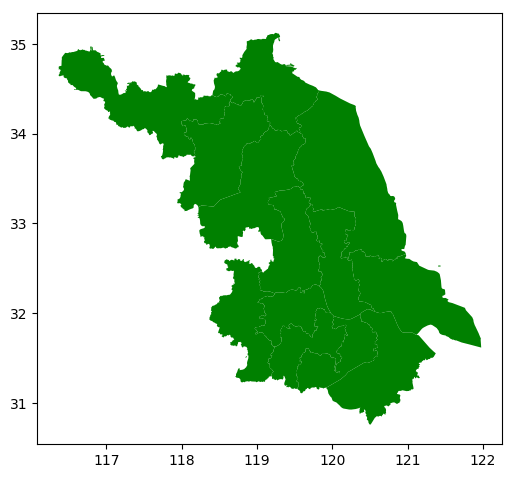

In [38]:
# 展示江苏省地图，横轴为经度，纵轴为纬度
data.plot(figsize=(6,6),color='green')

In [39]:
# 写入Shapefile
data.to_file("countries.shp")

# 写入GeoJSON
# 默认格式是Shapefile,通过driver参数可以设置其他类型
data.to_file("countries.geojson", driver='GeoJSON')

## 2.2 数据集筛选

GeoPandas提供了各种数据集筛选函数，以提取感兴趣区域。其在0.1.0版本中新增了Bounding Box Filter，在0.7.0版本中新增了Geometry Filter和Row Filter，以及其他需要Fiona库的过滤器。

### 2.2.1 Bounding Box Filter

 GeoPandas在0.1.0版本引入了Bounding Box Filter。Bounding Box Filter用于提取与边界框相交的子区域，注意边界框格式为(左下角x, 左下角y, 右上角x, 右上角y)。

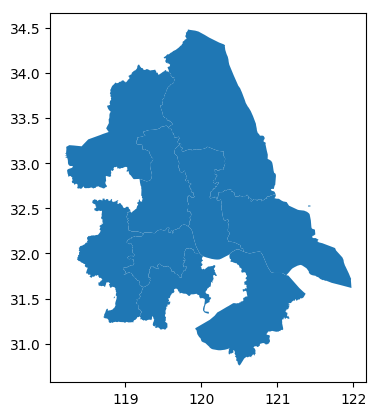

In [40]:
# 框选数据
import geopandas as gpd

# 设置框选范围
bbox = (119, 32, 121, 33)
# 读取数据
data = gpd.read_file("https://geo.datav.aliyun.com/areas_v3/bound/320000_full.json", bbox=bbox)

# 结果是筛选与bbox相交的子区域
data.plot()

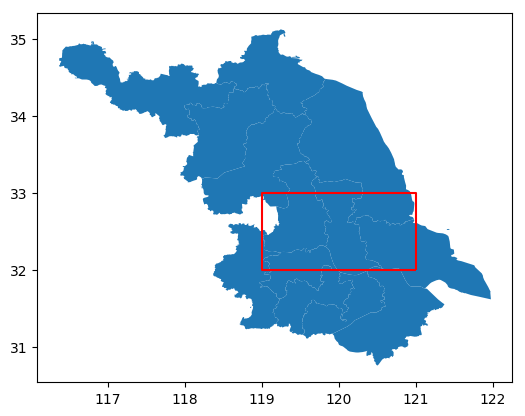

In [41]:
# 查看边界框与哪些子区域相交
# 在地图上绘制边界框
from shapely import geometry

# 设置框选范围
bbox = (119, 32, 121, 33)
# 读取数据
data = gpd.read_file("https://geo.datav.aliyun.com/areas_v3/bound/320000_full.json")
ax = data.plot()
# 在地图上绘制bbox框
ax = gpd.GeoSeries([geometry.box(minx=bbox[0],miny=bbox[1], 
                                 maxx=bbox[2],maxy=bbox[3]).boundary]).plot(ax=ax, color='red')


### 2.2.2 Geometry Filter

GeoPandas在0.7.0版本引入了Geometry Filter。与Bounding Box Filter类似，Geometry Filter也是筛选与指定区域相交的子区域，但Geometry Filter输入的是几何图形。

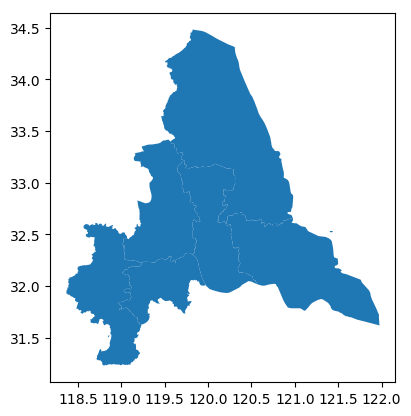

In [42]:
# 查看几何图形与哪些子区域相交
from shapely import geometry

# 设置框选范围
p = geometry.Polygon([(119,32),(120,33), (121, 33)])
# 读取数据
data = gpd.read_file("https://geo.datav.aliyun.com/areas_v3/bound/320000_full.json",mask=p)
# 筛选区域
data.plot()

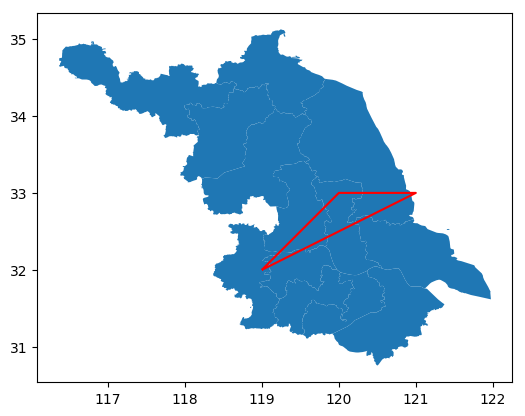

In [43]:
# 查看几何图形与哪些子区域相交
from shapely import geometry

# 设置框选范围
p = geometry.Polygon([(119,32),(120,33), (121, 33)])
# 读取数据
data = gpd.read_file("https://geo.datav.aliyun.com/areas_v3/bound/320000_full.json")

ax = data.plot()
ax = gpd.GeoSeries([p.boundary]).plot(ax=ax, color='red')

### 2.2.3 Row Filter

 GeoPandas在0.7.0版本引入了Row Filter。Row Filter用于提取指定行范围的数据。

In [44]:
# 读取前3行数据
data = gpd.read_file("https://geo.datav.aliyun.com/areas_v3/bound/320000_full.json",rows=3)
data

,adcode,name,childrenNum,level,parent,subFeatureIndex,geometry
0,320100,南京市,11,city,{'adcode': 320000},0,"MULTIPOLYGON (((119.1 32.5, 119.1 32.5, 119.1 ..."
1,320200,无锡市,7,city,{'adcode': 320000},1,"MULTIPOLYGON (((119.5 31.2, 119.5 31.1, 119.6 ..."
2,320300,徐州市,10,city,{'adcode': 320000},2,"MULTIPOLYGON (((118.4 34.4, 118.4 34.4, 118.4 ..."


In [45]:
# 读取第1行和第2行数据
data = gpd.read_file("https://geo.datav.aliyun.com/areas_v3/bound/320000_full.json",rows=slice(1, 3))
data

,adcode,name,childrenNum,level,parent,subFeatureIndex,geometry
0,320200,无锡市,7,city,{'adcode': 320000},1,"MULTIPOLYGON (((119.5 31.2, 119.5 31.1, 119.6 ..."
1,320300,徐州市,10,city,{'adcode': 320000},2,"MULTIPOLYGON (((118.4 34.4, 118.4 34.4, 118.4 ..."


### 2.2.4 cx索引器

除了标准的Pandas方法外，GeoPandas还提供使用cx索引器进行基于坐标的索引。通过cx索引器可以挑选特定区域。

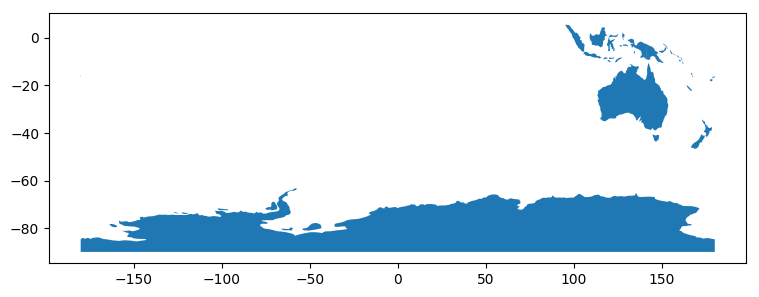

In [46]:
# 读取世界地图
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# 筛选与经度范围为80到200，纬度小于0相交的区域，这里坐标代表经纬度。
southern_world = world.cx[80:200, :0]

southern_world.plot(figsize=(9, 6))

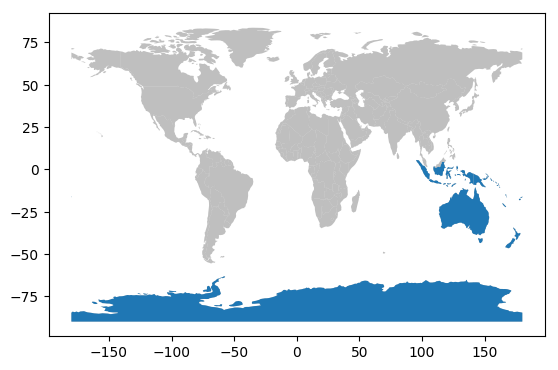

In [47]:
# 查看与哪些子区域相交
# 读取世界地图
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

ax = world.plot(color='grey',alpha=0.5)

# 筛选与经度范围为80到200，纬度小于0相交的区域，这里坐标代表经纬度。
southern_world = world.cx[80:200, :0]

southern_world.plot(ax=ax,figsize=(9, 6))

# 3 坐标参考系

## 3.1 坐标参考系简介

地信、计算机和遥感等领域的从业人员或多或少都会接触地理信息系统（GIS，Geographic Information System）的相关知识。所谓GIS简单来说就是一个以计算机为核心，对地理空间位置相关数据进行创建、管理、分析、绘制和展示的多功能集成信息系统。绘制地图，则需要了解GIS中的坐标参考系。本文只是简单介绍坐标参考系的相关内容。相关内容总结于以下文章，想要具体了解更多内容也可以看看这些文章。

+ [Coordinate Reference System and Spatial Projection](https://www.earthdatascience.org/courses/earth-analytics/spatial-data-r/intro-to-coordinate-reference-systems/)
+ [聊聊GIS中的坐标系](https://www.cnblogs.com/onsummer/p/12081889.html)
+ [基于geopandas的空间数据分析——坐标参考系篇](https://www.cnblogs.com/feffery/p/12285828.html)
+ [前后端都要懂一点的 GIS](https://mp.weixin.qq.com/s/UkQvMFEWyHDbsmh7LDWU7A)
+ [GIS基础知识](https://www.cnblogs.com/E7868A/p/11460865.html)

如下图所示，对于二维平面上的任何一点，我们可以通过如下的笛卡尔坐标系确定其唯一坐标，并用$(x,y)$表示。

![](image/2.png)

然而我们生活在一个恰好是“圆形”的三维地球上，一般来说要定义地球上物体的位置，需要一个适应地球形状的三维坐标系。但当我们在纸上或计算机屏幕上展示地球时，受限于存储介质（纸张、沙盘、书本、屏幕）原因，不得不使用二维平面来表达三维的地球。这种将三维球面转换为二维平面所用到的坐标系参考就是坐标参考系统（CRS，Coordinate Reference System)，如下图所示。

![](image/3.png)


常见情况下，根据不同的转换方式，CRS又可分为地理坐标系和投影坐标系。

**地理坐标系统**

 参考平面为球面，用球面坐标来表示地球上的位置，叫做地理坐标系统。这些坐标系的坐标单位通常为角度，如经纬度。所谓经度就是指离被称为本初子午线的南北方向走线以东或以西的度数。纬度则是指地球某点与球心的连线和地球赤道面所成的线面角。如下图所示：
 
 ![](image/4.png)
 
 在数据表示中，东经正数，西经为负数，经度范围为-180度到180度。赤道以北为北纬，以南为南纬，纬度范围为-90度到90度。按照常用地理坐标系统表示的二维地图如下所示：
 
 ![](image/5.png)

**投影坐标系统**

由于我们所在的地球实际不是规则球体，一经度和一纬度代表的实际距离是不相等的（赤道除外）。这导致我们无法通过经纬度坐标精确计算某块地区的面积，长宽。也无法精准表达某一块地区的实际形状。因此，有必要采取某些方法将地球表面投影到一个二维平面，这种地理投影方法也就是投影坐标系，实际作用为把地球表面经纬度按照一定的数学规则转换为平面坐标。

投影坐标系在二维平面中定义，其始终基于地理坐标系，位置由二维坐标标识，度量单位用米、千米等来表示。不同的投影方法会导致不同的投影结果，因此各种各样的投影坐标系统被提出。但是不管是哪种地图投影方法，都会导致地图投影变形。三维投影二维出现投影变形是不可避免的，但不会在任何位置都会产生变形。那些没有发生变形的点或线称为标准点线，距离标准点线越近，变形程度则越小。因此在实际投影某块区域时，最好选择标标准点线离该区域近的投影坐标系。

关于常见投影方法的介绍可以阅读本节开头给出的参考文章。想要感受不同投影方法带来的效果，可以使用一个非常酷的坐标系投影介绍网站：[worldmapcreator](http://www.worldmapcreator.com/#!/home)。在worldmapcreator中，我们可以选择不同的投影方法来实时显示投影变换效果，以及自定义投影结果，具体如下：

![](image/6.png)

![](image/7.png)

## 3.2 EPSG编码

EPSG：European Petroleum Survey Group（欧洲石油调查小组）是一个涉及测地学、测量、制图学与石油勘探相关的科学组织，它维护和发布的EPSG编码系统提供了各种坐标参照系统crs的数据集参数。我们通过如下网站查询EPSG投影坐标的编码：[espg.io](https://epsg.io/)，该网站界面介绍如下：

![](image/8.png)

互联网常见的坐标参考系如下图所示。WGS84和CGCS2000都为地理坐标系统。其中WGS84（World Geodetic System 1984）是目前应用最为广泛的坐标系统。**在没有特别声明的时候，默认使用WGS84坐标系统存储地图数据或提供地图数据**。WGS84坐标单位为度，WGS84的EPSG代码为EPSG:4326。CGCS2000是我国当前最新的国家大地坐标系，它的EPSG编码为EPSG:4490，在大多数精度要求不高的情况下，我们可以默认WGS84坐标系等同于CGCS2000坐标系。

![](image/9.png)

除此之外，WGS84 Web Mercator（EPSG:3857）坐标系统也较为常用。EPSG:3857为投影坐标系统，单位为米。EPSG:3857在WGS84坐标系基础上进行伪墨卡托投影（Pseudo-Mercator）得到。关于Pseudo-Mercator介绍见[墨卡托投影](https://zhuanlan.zhihu.com/p/33295151)。墨卡托投影能够保证方向的正确，所以EPSG:3857广泛用于导航海航。但越到高纬度，墨卡托投影会导致大小扭曲越严重，到两极会被放到无限大。在长度表示上EPSG:3857有很大偏差，无法用于实际距离和面积的测算。墨卡托投影下每个国家的大小和实际大小的差异见下图：

![](image/10.gif)

当然CRS还有其他常见的数据编码格式。计算机领域更多地使用EPSG编码。

## 3.3 在GeoPandas中管理坐标参考系

GeoPandas提供了丰富的函数接口以管理坐标参考系，具体使用如下：

### 3.3.1 坐标参考系管理

**查看坐标管理系**

In [48]:
# 框选数据
import geopandas as gpd

# 读取江苏省数据
data = gpd.read_file("https://geo.datav.aliyun.com/areas_v3/bound/320000_full.json")

# 查看坐标管理系，可以看到默认坐标参考系为EPSG:4326，单位为度。
data.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [49]:
# 计算面积，可以看到面积计算结果不对，因为单位是度
# 直接计算面积会报错，提示UserWarning: Geometry is in a geographic CRS
sum(data.area)

9.997823062190006

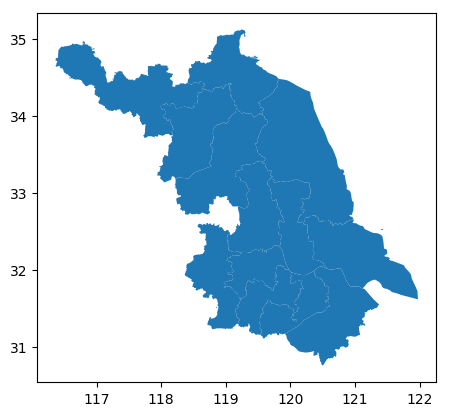

In [50]:
# 绘图
data.plot()

**设置坐标参考系**

对于有些几何形状或者坐标点没有设置坐标参考系，为了告诉GeoPandas如何解释这些几何形状，需要设置默认坐标系。GeoPandas提供set_crs函数来执行这一操作。

In [51]:
p = gpd.GeoSeries([geometry.Point([134.1233,23.456])])
# 没有默认坐标系
p.crs

In [52]:
# 重新设置坐标系
p = p.set_crs("EPSG:4326")
p.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

**重设坐标参考系**

GeoPandas提供了crs函数以重新设置坐标参考系。

In [53]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

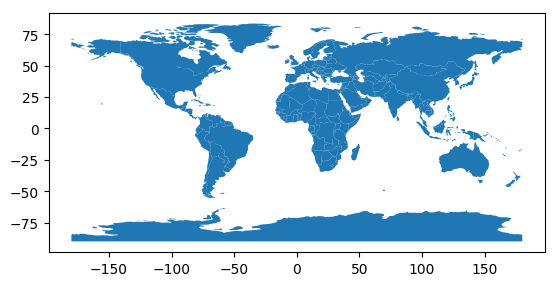

In [54]:
world.plot()

In [55]:
# 将坐标参考系转换为EPSG:3857
# 这里舍去北极圈和南极圈数据，在这些地区WGS84/ Pseudo-Mercator变形严重
world = world.to_crs('EPSG:3857')
world = world[(world.name != "Antarctica") & (world.name != "Fr. S. Antarctic Lands")]
world.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

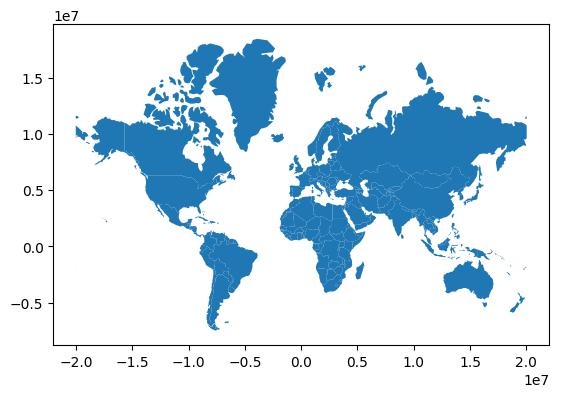

In [56]:
# 横纵坐标尺度变为米
world.plot()

### 3.3.2 选择合适的投影坐标参考系

**坐标参考系选择方法**

如果我们获得是地理坐标系数据，如WGS84，在没有更多信息的情况下，如何转换到投影坐标参考系。一个好的办法就是根据所在区域的几何中心点，从前面提到的[espg.io](https://epsg.io/)寻找合适EPSG编码。**这种方法很不专业，只是低精度使用！**

以投影江苏省地图为例，一种办法是找到整个国家的几何中心，一种是找到当地的几何中心。

In [57]:
# 框选数据
import geopandas as gpd

# 读取整个国家的数据，无子区域数据
data_china = gpd.read_file("https://geo.datav.aliyun.com/areas_v3/bound/100000.json")

# 查看经纬度几何中心，POINT (103.9 36.4)
# 东经103.9
data_china.centroid

0    POINT (103.9 36.4)
dtype: geometry

In [58]:
# 框选数据
import geopandas as gpd

# 读取江苏省数据，无子区域数据
data = gpd.read_file("https://geo.datav.aliyun.com/areas_v3/bound/320000.json")

# 查看经纬度几何中心，POINT (119.5 33.0)
# 东经119.5
data.centroid

0    POINT (119.5 33.0)
dtype: geometry

接下来我们可以在 [espg.io](https://epsg.io/)中，搜索New Beijing kind:PROJCRS。这个搜索词表示搜索以New Beijing为关键词，投影坐标(kind:PROJCRS)的结果。当然以beijing kind:PROJCRS和xian kind:PROJCRS也是可以的。这些都是我国常用的坐标系，不添加kind:PROJCRS也没关系，搜索结果Coordinate reference systems中有相应的选项。然后我们查看地区的几何中心在是否坐标系简介的Area of use中。如下图所示：

![](image/11.png)

比如以整个中国的几何中心(103.9 36.4)查找的结果为[EPSG:4573](https://epsg.io/4573)，如下所示：

![](image/12.png)

以江苏省的几何中心(119.5 33.0)查找的结果为[EPSG:4586](https://epsg.io/4586)，如下所示：

![](image/13.png)




**坐标参考系转换实例**

江苏省的面积为10.72万平方公里，通过EPSG:4573计算的面积为10.84万平方公里，EPSG:4586计算的面积为10.38万平方公里。这两种都是近似估算，实际不会这么粗糙。但是可以看到选择合适的EPSG编码结果都大差不差，想要更准确的结果，可以自行查找其他EPSG编码。

此外，为了展示结果可靠性 我们可以获得某一坐标位置进行绘制。通过地图查询苏州市上的某一经纬度坐标(120.601868 31.332525)，如下所示:

![](image/14.png)

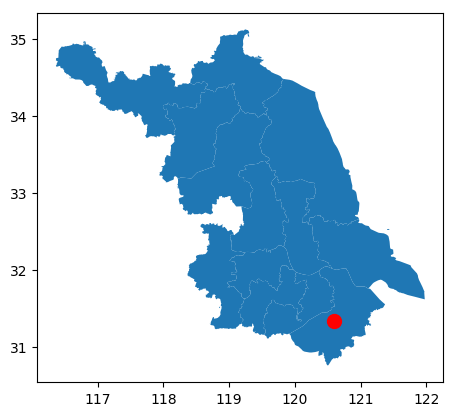

In [59]:
# 框选数据
import geopandas as gpd
from shapely import geometry

# 读取江苏省数据
data = gpd.read_file("https://geo.datav.aliyun.com/areas_v3/bound/320000_full.json")


ax = data.plot()
# 绘制点，该坐标点需要预先设置crs
p = gpd.GeoSeries([geometry.Point([120.601868,31.332525])]).set_crs("EPSG:4326")
p.plot(ax=ax, color='red', markersize=100)

In [60]:
# EPSG:4573下计算面积，EPSG:4573单位尺度为米
# 1平方公里等于10的6次方米，进行计算后结果为10.84万平方公里
data.to_crs("EPSG:4573").area.sum()/1e6/1e4

10.849724500925806

0    POINT (19993305.0 3575282.1)
dtype: geometry

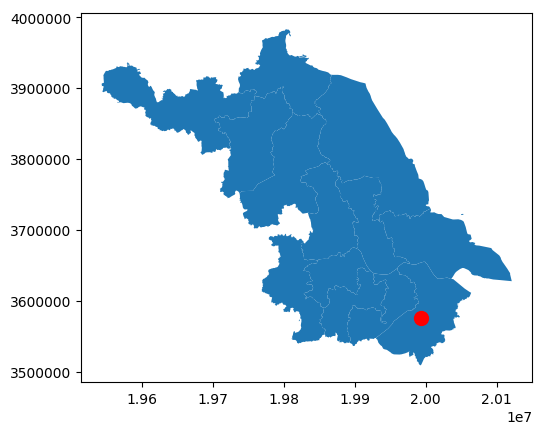

In [61]:
ax = data.to_crs("EPSG:4573").plot()

p = gpd.GeoSeries([geometry.Point([120.601868,31.332525])]).set_crs("EPSG:4326")
p.to_crs("EPSG:4573").plot(ax=ax, color='red', markersize=100)
p.to_crs("EPSG:4573")

In [62]:
# EPSG:4586下计算面积
data.to_crs("EPSG:4586").area.sum()/1e6/1e4

10.381446380451157

0    POINT (842904.5 3473513.1)
dtype: geometry

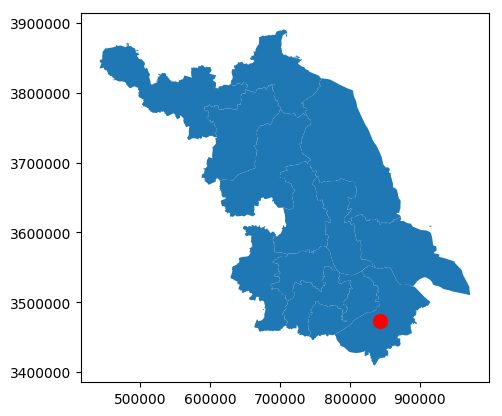

In [63]:
# 注意绘图结果是有差别的
ax = data.to_crs("EPSG:4586").plot()

p = gpd.GeoSeries([geometry.Point([120.601868,31.332525])]).set_crs("EPSG:4326")
p.to_crs("EPSG:4586").plot(ax=ax, color='red', markersize=100)
p.to_crs("EPSG:4586")

从上面可以看到EPSG:4573和EPSG:4586表示地图的横坐标单位不一样。EPSG:4573代表的是New Beijing / Gauss-Kruger zone 18，这个zone就是指带号的意思。EPSG:4586代表的是New Beijing / Gauss-Kruger CM 117E，表示没有加带号。简单解释：例如常见的6度分带投影，表示从零度子午线开始，自西向东每个经差6度为一投影带，全球共分60个带，用1，2，3，4，5，... ，60表示。比如没带号的横坐标为500000米。有带号zone 18，表示在没带号的横坐标前加上带号18，变为18500000。具体可以查阅[投影分带](https://www.cnblogs.com/ParanoiaApe/p/9130273.html)。

在本例中，如果以江苏省的几何中心查找加带号的坐标系，则应该是New Beijing / Gauss-Kruger zone 20（EPSG:4575）。与EPSG:4586相比，以EPSG:4575为基准绘图，横坐标加了带号（20），面积计算结果和是相等的。这些只是GIS基础知识，本文说得非常简单也有诸多错误（因为作者非专业人士），低精度软件绘制地图也不需要用到过多专业的知识。如果想高精度绘图，请从头开始学习GIS相关知识。

In [64]:
data.to_crs("EPSG:4575").area.sum()/1e6/1e4

10.381446380451155

0    POINT (20842904.5 3473513.1)
dtype: geometry

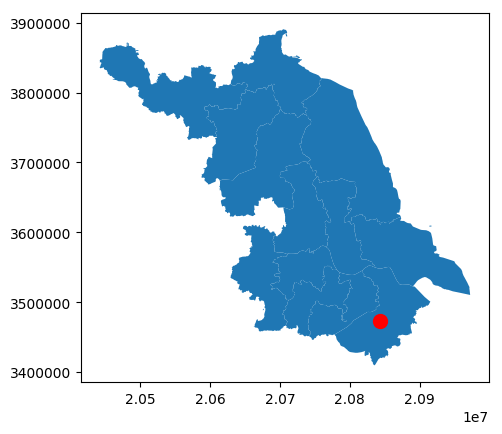

In [65]:
ax = data.to_crs("EPSG:4575").plot()
p = gpd.GeoSeries([geometry.Point([120.601868,31.332525])]).set_crs("EPSG:4326")
p.to_crs("EPSG:4575").plot(ax=ax, color='red', markersize=100)

# EPSG:4586 为POINT (842904.5 3473513.1)
p.to_crs("EPSG:4575")

# 4 参考
## 4.1 GeoPandas使用

+ [GeoPandas](https://github.com/geopandas/geopandas)
+ [GeoPandas-doc](https://geopandas.org/en/stable/docs.html)
+ [DataV.GeoAtlas](http://datav.aliyun.com/portal/school/atlas/area_selector)
+ [espg.io](https://epsg.io/)
+ [EPSG:4573](https://epsg.io/4573)
+ [EPSG:4586](https://epsg.io/4586)

## 4.2  相关资料

+ [Coordinate Reference System and Spatial Projection](https://www.earthdatascience.org/courses/earth-analytics/spatial-data-r/intro-to-coordinate-reference-systems/)
+ [聊聊GIS中的坐标系](https://www.cnblogs.com/onsummer/p/12081889.html)
+ [基于geopandas的空间数据分析——坐标参考系篇](https://www.cnblogs.com/feffery/p/12285828.html)
+ [前后端都要懂一点的 GIS](https://mp.weixin.qq.com/s/UkQvMFEWyHDbsmh7LDWU7A)
+ [GIS基础知识](https://www.cnblogs.com/E7868A/p/11460865.html)
+ [worldmapcreator](http://www.worldmapcreator.com/#!/home)
+ [墨卡托投影](https://zhuanlan.zhihu.com/p/33295151)
+ [投影分带](https://www.cnblogs.com/ParanoiaApe/p/9130273.html)